In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix as cm
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [4]:
df=data.copy()

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [7]:
df["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

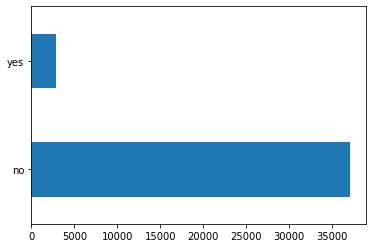

In [8]:
df["y"].value_counts().plot.barh();

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


# Veri Ön İşleme

In [10]:
#Eksik veri kontrolü
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

### Kategorik Değikenler

In [12]:
kat=df.select_dtypes(include=["object"])
kat_df=df.select_dtypes(include=["object"]).columns
print(kat_df)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')


### Sürekli Değişkenler

In [13]:
num=df.select_dtypes(include=["float64","int64"])
df_num=df.select_dtypes(include=["float64","int64"]).columns
print(df_num)

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


## Veri Görselleştirme

Sayısal Değişkenlerin Görselleştirilmesi


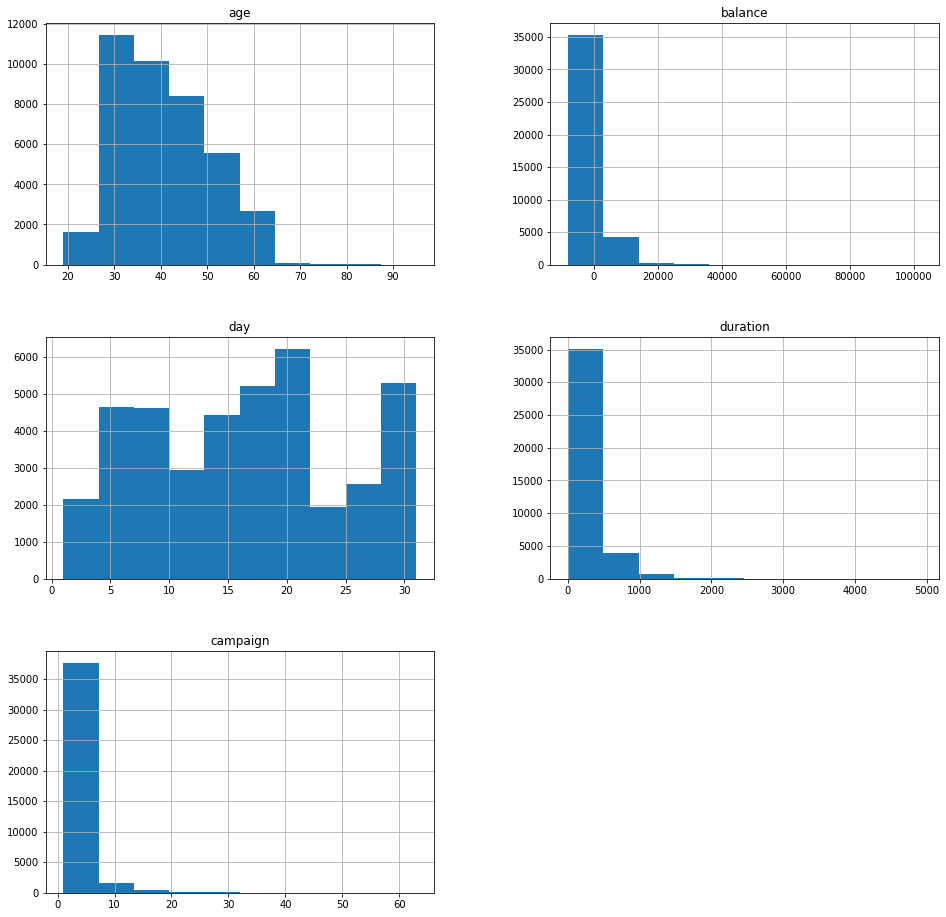

In [15]:
print("Sayısal Değişkenlerin Görselleştirilmesi")
df.hist(column=df_num,figsize=(16,16))
plt.show()

Kategorik Değişkenlerin Görselleştirilmesi


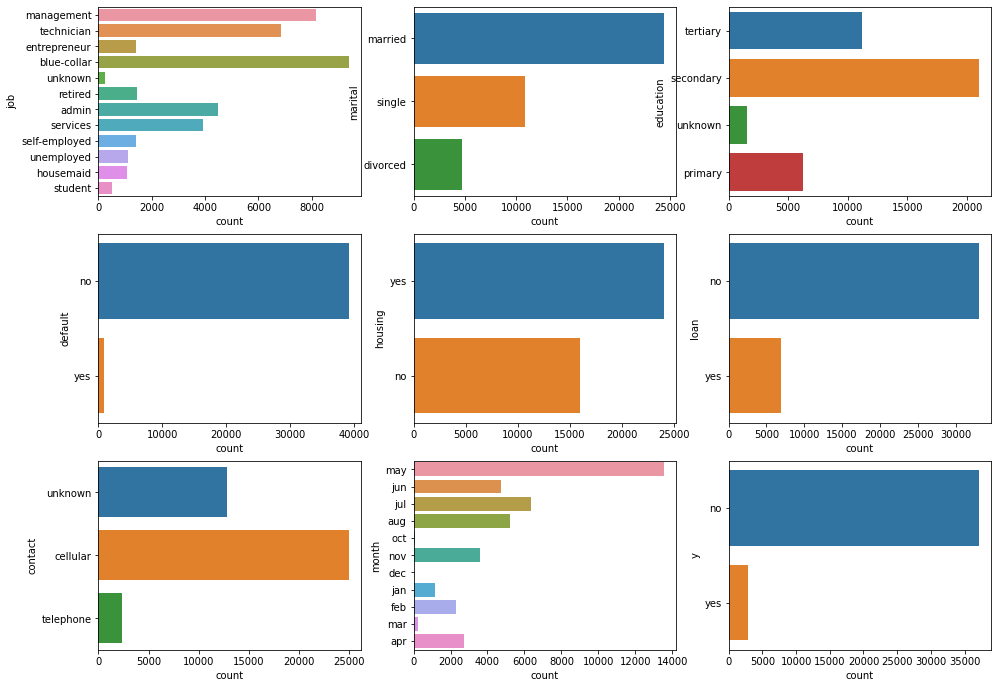

In [16]:
print("Kategorik Değişkenlerin Görselleştirilmesi")
fig, axes = plt.subplots(4,3,figsize=(16, 16))
for i, ax in enumerate(axes.ravel()):
    if i > 8:
        ax.set_visible(False)
        continue
    sns.countplot(y = kat_df[i], data=df, ax=ax)
plt.show()

In [17]:
df.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


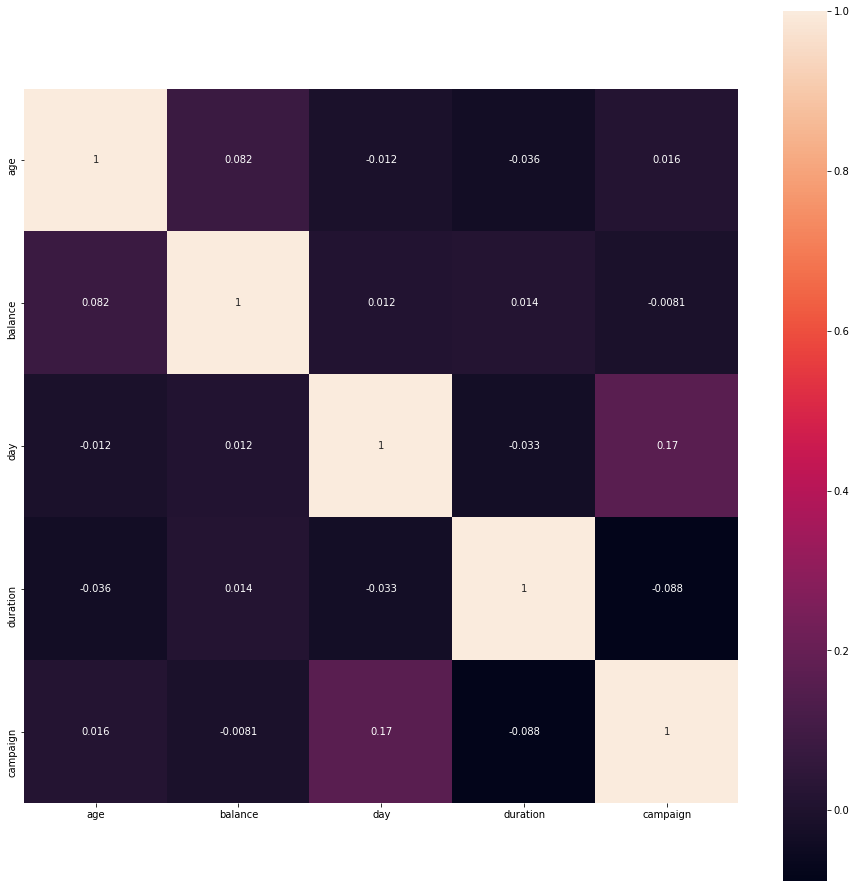

In [18]:
correlation=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation,square=True,annot=True);
plt.show()

## One-Hot Encoding Dönüşümü

In [19]:
columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'y','duration'], axis =1)

In [20]:
df

,age,balance,day,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
0,58,2143,5,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,33,2,5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,47,1506,5,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
39996,30,3340,3,3,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
39997,54,200,3,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39998,34,1047,3,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


## Veri Standardizasyonu

In [21]:
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [22]:
data_scaled

,age,balance,day,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
0,0.513158,0.092259,0.133333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.328947,0.073067,0.133333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.184211,0.072822,0.133333,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.368421,0.086476,0.133333,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.184211,0.072812,0.133333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.447368,0.076390,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39996,0.144737,0.103127,0.066667,0.032258,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39997,0.460526,0.074619,0.066667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39998,0.197368,0.082309,0.066667,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
y=data_scaled.y_yes
X=data_scaled.drop(['y_yes','y_no'], axis = 1)

In [24]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.238612
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39964
Method:                           MLE   Df Model:                           35
Date:                Mon, 16 Nov 2020   Pseudo R-squ.:                 0.08157
Time:                        12:15:03   Log-Likelihood:                -9544.5
converged:                       True   LL-Null:                       -10392.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.3058      0.194     -1.576      0.115      -0.686       0.074
balance                 2.1564      0.633      3.408      0.001       0.916       3.396
day                     0.4585      0.089      5.155      0.000       0.284       0.633
campaign               -3.1227      0.551     -5.667      0.000      -4.203      -2.043
job_admin               1.9078        nan        nan        nan         nan         nan
job_blue-collar         1.8377        nan        nan        nan         nan         nan
job_entrepreneur        1.7683   8.31e+04   2.13e-05      1.000   -1.63e+05    1.63e+05
job_housemaid           1.5618        nan        nan        nan         nan         nan
job_management          1.8350        nan        nan        nan         nan         nan
job_retired             2.3130   6.66e+05   3.48e-06      1.000    -1.3e+06     1.3e+06
job_self-employed       1.8846        nan        nan        nan         nan         nan
job_services            1.8101        nan        nan        nan         nan         nan
job_student             2.0424        nan        nan        nan         nan         nan
job_technician          1.9075        nan        nan        nan         nan         nan
job_unemployed          1.9765        nan        nan        nan         nan         nan
job_unknown             1.9922   5.25e+05   3.79e-06      1.000   -1.03e+06    1.03e+06
marital_divorced      -13.4383        nan        nan        nan         nan         nan
marital_married       -13.7557        nan        nan        nan         nan         nan
marital_single        -13.4522        nan        nan        nan         nan         nan
education_primary      10.8814        nan        nan        nan         nan         nan
education_secondary    10.9354        nan        nan        nan         nan         nan
education_tertiary     11.1691        nan        nan        nan         nan         nan
education_unknown      10.8071        nan        nan        nan         nan         nan
default_no             -0.5572        nan        nan        nan         nan         nan
default_yes            -0.4889        nan        nan        nan         nan         nan
housing_no             -0.2941    1.2e+06  -2.46e-07      1.000   -2.34e+06    2.34e+06
housing_yes            -0.7520   1.24e+06  -6.07e-07      1.000   -2.43e+06    2.43e+06
loan_no                -0.4042        nan        nan        nan         nan         nan
loan_yes               -0.6418        nan        nan        nan         nan         nan
contact_cellular        0.2499        nan        nan        nan         nan         nan
contact_telephone      -0.2081        nan        nan        nan         nan         nan
contact_unknown        -1.0879        nan        nan        nan         nan         nan
month_apr               0.1946   1.78e+06   1.09e-07      1.000   -3.49e+06    3.49e+06
month_aug              -1.1910   1.78e+06  -6.69e-07      1.000   -3.49e+

In [25]:
#scikit-learn

In [26]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [27]:
loj_model.intercept_

array([-0.73712503])

In [28]:
loj_model.intercept_

array([-0.73712503])

### Train-Test Ayrımı

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [31]:
X_train,y_train=upSample(X_train, y_train)

## Lojistik Regresyon

In [41]:
loj = LogisticRegression(solver = "liblinear",random_state=42)
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(random_state=42, solver='liblinear')

In [42]:
y_pred=loj_model.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79      7424
         1.0       0.13      0.60      0.21       576

    accuracy                           0.67      8000
   macro avg       0.54      0.64      0.50      8000
weighted avg       0.90      0.67      0.75      8000



In [44]:
accuracy_score(y_test, loj_model.predict(X_test))

0.6685

Confusion Matrix 



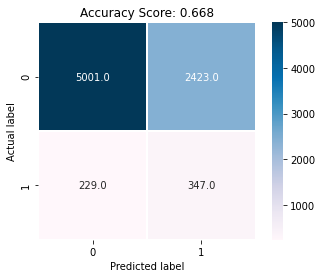

In [45]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test,y_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

## Hata

In [50]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.33
Root Mean Squared Error (RMSE): 0.58


## Cohen-Matthew Score

In [51]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.1001384402399631
Matthew Score 0.1499814960276955


# Gaussian Naive Bayes

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [54]:
X_train,y_train=upSample(X_train, y_train)

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [57]:
nb_model.predict(X_test)[0:10]

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 1.])

In [58]:
nb_model.predict_proba(X_test)[0:10]

array([[8.95908983e-06, 9.99991041e-01],
       [2.89820433e-05, 9.99971018e-01],
       [9.99980407e-01, 1.95930103e-05],
       [1.93895275e-01, 8.06104725e-01],
       [9.49367301e-03, 9.90506327e-01],
       [4.62874705e-03, 9.95371253e-01],
       [5.32377097e-01, 4.67622903e-01],
       [3.44111028e-05, 9.99965589e-01],
       [9.26287971e-03, 9.90737120e-01],
       [2.25343997e-05, 9.99977466e-01]])

In [59]:
y_pred = nb_model.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.221875

Confusion Matrix 



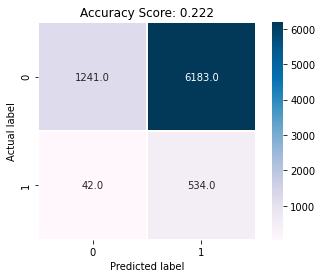

In [61]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, nb_model.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [66]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.78
Mean Squared Error (MSE): 0.78
Root Mean Squared Error (RMSE): 0.88


### Cohen-Matthew Score

In [67]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.015927276314341876
Matthew Score 0.06638690799607962


# KNN

## Model & Tahmin

In [68]:
df = data.copy()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled


In [71]:
X_train,y_train=upSample(X_train, y_train)

## Model Tuning

In [72]:
knn = KNeighborsClassifier(n_neighbors=100,weights="distance")
knn_tuned=knn.fit(X_train, y_train)

In [73]:
knn_tuned.score(X_test, y_test)

0.70725

In [74]:
y_pred = knn_tuned.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.70725

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82      7424
         1.0       0.13      0.51      0.20       576

    accuracy                           0.71      8000
   macro avg       0.54      0.62      0.51      8000
weighted avg       0.89      0.71      0.78      8000



Confusion Matrix 



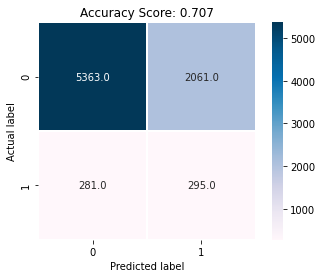

In [77]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, knn_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [82]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54


### Cohen-Matthew Score

In [83]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.09670710785826242
Matthew Score 0.13300418786223042


# SVC

## Model & Tahmin

In [84]:
df = data.copy()
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled


In [86]:
X_train,y_train=upSample(X_train, y_train)

In [87]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [88]:
svm_model

SVC(kernel='linear')

In [89]:
y_pred = svm_model.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.72275

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83      7424
         1.0       0.13      0.51      0.21       576

    accuracy                           0.72      8000
   macro avg       0.54      0.63      0.52      8000
weighted avg       0.89      0.72      0.79      8000



## Model Tuning

Confusion Matrix 



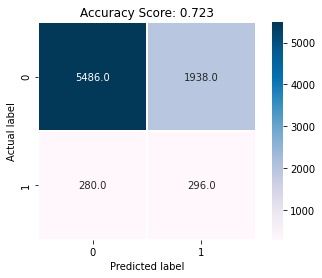

In [92]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, svm_model.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [97]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.53


## Cohen-Matthew Score

In [98]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.10862981372051006
Matthew Score 0.14568114194850426


# RBF SVC

## Model & Tahmin

In [133]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [134]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [135]:
X_train,y_train=upSample(X_train, y_train)

In [136]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [137]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.722875

Confusion Matrix 



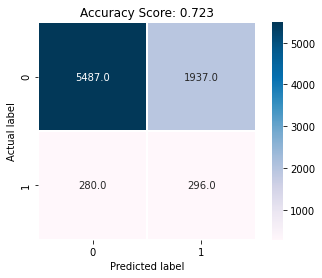

In [138]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, svc_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [143]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.53


### Cohen-Matthew Score

In [144]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.10872508691638993
Matthew Score 0.14577874426074097


# Yapay Sinir Ağları

## Model & Tahmin

In [350]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [351]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [352]:
X_train,y_train=upSample(X_train, y_train)

In [353]:
from sklearn.preprocessing import StandardScaler  

In [354]:
scaler = StandardScaler()

In [355]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [356]:
X_test_scaled[0:5]

array([[ 0.73976635, -0.40014654,  0.12832976, -0.2313845 , -0.36412453,
        -0.51538109, -0.18507958, -0.15536061,  1.88517728, -0.21633957,
        -0.19497769, -0.31698899, -0.13708918, -0.45307746, -0.17382672,
        -0.07800412,  2.66840459, -1.15505805, -0.66288321, -0.40526678,
        -1.00818715,  1.46853917, -0.19890068,  0.13924187, -0.13924187,
        -0.89246928,  0.89246928,  0.42481915, -0.42481915,  0.66459499,
        -0.24741224, -0.5753272 ,  2.86510238, -0.36088239, -0.01298045,
        -0.27931757, -0.14998765, -0.41610782, -0.35033226, -0.1576765 ,
        -0.66472671, -0.30559346, -0.09318391],
       [ 1.22266124, -0.4639824 ,  0.84074837, -0.5803779 , -0.36412453,
        -0.51538109, -0.18507958, -0.15536061, -0.53045409,  4.62236299,
        -0.19497769, -0.31698899, -0.13708918, -0.45307746, -0.17382672,
        -0.07800412,  2.66840459, -1.15505805, -0.66288321, -0.40526678,
         0.99187933, -0.68094881, -0.19890068,  0.13924187, -0.13924187,
   

In [357]:
from sklearn.neural_network import MLPClassifier

In [358]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [359]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.792625

## Model Tuning

In [360]:
mlpc

MLPClassifier()

In [361]:
?mlpc

In [362]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [363]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [364]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.749875

Confusion Matrix 



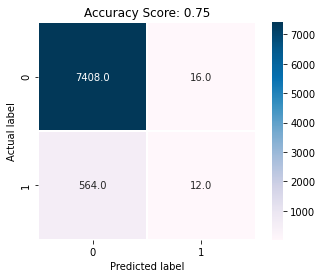

In [365]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, mlpc_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

## Hata

In [190]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.27
Root Mean Squared Error (RMSE): 0.52


### Cohen-Matthew Score

In [191]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.12549960031974416
Matthew Score 0.16886289659443265


# CART

## Model & Tahmin

In [192]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [193]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [194]:
X_train,y_train=upSample(X_train, y_train)

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [214]:
cart_model

DecisionTreeClassifier()

In [215]:
x = [9]

In [216]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [217]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.878125

## Model Tuning

In [202]:
cart_model

DecisionTreeClassifier()

In [ ]:
?cart_model

In [203]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [204]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.9min finished


In [205]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 9, 'min_samples_split': 10}


In [ ]:
#final

In [206]:
cart = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 10)
cart_tuned = cart.fit(X_train, y_train)

In [219]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.61325

Confusion Matrix 



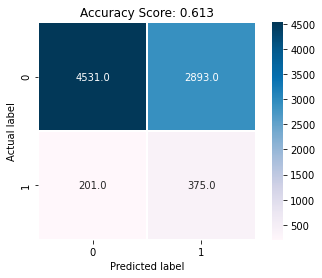

In [220]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, cart_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [225]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.62


### Cohen-Matthew Score

In [226]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.08282662518141903
Matthew Score 0.13743748925879593


# Random Forests

In [227]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [228]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [229]:
X_train,y_train=upSample(X_train, y_train)

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [232]:
rf_model

RandomForestClassifier()

In [233]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.924

## Model Tuning

In [234]:
rf_model

RandomForestClassifier()

In [235]:
?rf_model

In [236]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [237]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [238]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 80.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [239]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
#final

In [241]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  n_jobs=-1,
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=500, n_jobs=-1)

In [242]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.773

Confusion Matrix 



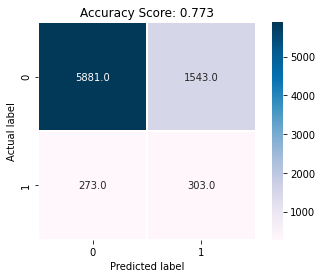

In [243]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, rf_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [244]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

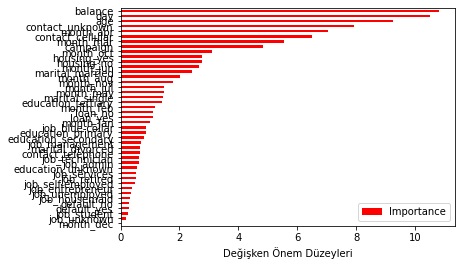

In [245]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Hata

In [250]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.48


### Cohen-Matthew Score

In [251]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.1577681970302981
Matthew Score 0.1952265339314258


# Gradient Boosting Machines

In [252]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [253]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [254]:
X_train,y_train=upSample(X_train, y_train)

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

In [256]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [257]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.719125

## Model Tuning

In [258]:
gbm_model

GradientBoostingClassifier()

In [ ]:
?gbm_model

In [259]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [260]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [261]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 102.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 159.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 184.0min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [262]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}


In [264]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 500)

In [265]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [266]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.92225

Confusion Matrix 



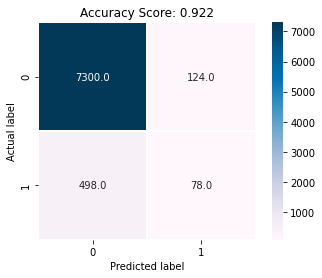

In [267]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, gbm_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [272]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.28


### Cohen-Matthew Score

In [273]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.1694618326318713
Matthew Score 0.19559833610202237


# XGBoost

In [274]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [275]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [276]:
X_train,y_train=upSample(X_train, y_train)

In [277]:
#!pip install xgboost
from xgboost import XGBClassifier

In [278]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [279]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [280]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.809625

## Model Tuning

In [281]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
?xgb_model

In [285]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05]}

In [286]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [287]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 125.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 209.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 330.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 446.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 570.5min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [288]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 2000, 'subsample': 0.8}

In [297]:
xgb = XGBClassifier(learning_rate = 0.1, 
                    max_depth = 6,
                    n_estimators = 2000,
                    subsample = 0.8)

In [298]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [299]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.908

Confusion Matrix 



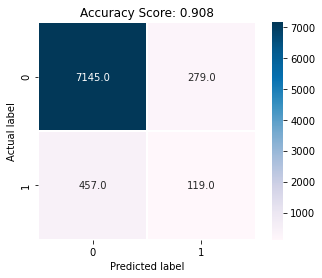

In [300]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, xgb_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

## Hata

In [305]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30


### Cohen-Matthew Score

In [306]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.19710959454034538
Matthew Score 0.200934083415545


# LightGBM

In [307]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [308]:
from lightgbm import LGBMClassifier

In [309]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [310]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.929

In [311]:
## Model Tuning

In [312]:
lgbm_model

LGBMClassifier()

In [ ]:
?lgbm_model

In [313]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.05],
        "min_child_samples": [5,10,20]}

In [314]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [315]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 70.1min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [316]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_samples': 10,
 'n_estimators': 1000,
 'subsample': 0.6}

In [317]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 1000,
                       min_child_samples = 10)

In [318]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [319]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.93025

Confusion Matrix 



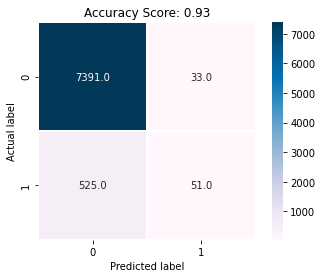

In [320]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, lgbm_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

## Hata

In [325]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26


### Cohen-Matthew Score

In [326]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.13876129797006964
Matthew Score 0.21326335983116276


# CatBoost

## Model & Tahmin

In [327]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [328]:
#!pip install catboost
from catboost import CatBoostClassifier

In [329]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.045252
0:	learn: 0.6426025	total: 339ms	remaining: 5m 39s
1:	learn: 0.5985942	total: 351ms	remaining: 2m 55s
2:	learn: 0.5607980	total: 362ms	remaining: 2m
3:	learn: 0.5258709	total: 372ms	remaining: 1m 32s
4:	learn: 0.4960425	total: 385ms	remaining: 1m 16s
5:	learn: 0.4684919	total: 399ms	remaining: 1m 6s
6:	learn: 0.4449386	total: 410ms	remaining: 58.1s
7:	learn: 0.4234861	total: 430ms	remaining: 53.4s
8:	learn: 0.4046867	total: 445ms	remaining: 49s
9:	learn: 0.3876050	total: 460ms	remaining: 45.6s
10:	learn: 0.3727446	total: 477ms	remaining: 42.9s
11:	learn: 0.3590407	total: 490ms	remaining: 40.3s
12:	learn: 0.3468085	total: 502ms	remaining: 38.1s
13:	learn: 0.3358282	total: 513ms	remaining: 36.2s
14:	learn: 0.3268928	total: 523ms	remaining: 34.4s
15:	learn: 0.3188494	total: 535ms	remaining: 32.9s
16:	learn: 0.3110529	total: 549ms	remaining: 31.7s
17:	learn: 0.3037204	total: 562ms	remaining: 30.7s
18:	learn: 0.2974261	total: 574ms	remaining: 29.7s
19:	learn: 0

163:	learn: 0.2230097	total: 2.92s	remaining: 14.9s
164:	learn: 0.2229091	total: 2.95s	remaining: 14.9s
165:	learn: 0.2228315	total: 2.96s	remaining: 14.9s
166:	learn: 0.2227879	total: 2.98s	remaining: 14.9s
167:	learn: 0.2226946	total: 3.01s	remaining: 14.9s
168:	learn: 0.2226536	total: 3.03s	remaining: 14.9s
169:	learn: 0.2225680	total: 3.04s	remaining: 14.9s
170:	learn: 0.2224613	total: 3.06s	remaining: 14.8s
171:	learn: 0.2223744	total: 3.07s	remaining: 14.8s
172:	learn: 0.2222830	total: 3.09s	remaining: 14.8s
173:	learn: 0.2222357	total: 3.1s	remaining: 14.7s
174:	learn: 0.2221523	total: 3.11s	remaining: 14.7s
175:	learn: 0.2220788	total: 3.13s	remaining: 14.7s
176:	learn: 0.2220129	total: 3.15s	remaining: 14.7s
177:	learn: 0.2219839	total: 3.17s	remaining: 14.6s
178:	learn: 0.2219170	total: 3.18s	remaining: 14.6s
179:	learn: 0.2218554	total: 3.19s	remaining: 14.5s
180:	learn: 0.2217909	total: 3.21s	remaining: 14.5s
181:	learn: 0.2217468	total: 3.24s	remaining: 14.6s
182:	learn: 0

324:	learn: 0.2130855	total: 5.52s	remaining: 11.5s
325:	learn: 0.2130283	total: 5.54s	remaining: 11.4s
326:	learn: 0.2129632	total: 5.55s	remaining: 11.4s
327:	learn: 0.2128903	total: 5.58s	remaining: 11.4s
328:	learn: 0.2128503	total: 5.6s	remaining: 11.4s
329:	learn: 0.2128113	total: 5.61s	remaining: 11.4s
330:	learn: 0.2127227	total: 5.63s	remaining: 11.4s
331:	learn: 0.2126520	total: 5.64s	remaining: 11.3s
332:	learn: 0.2125785	total: 5.66s	remaining: 11.3s
333:	learn: 0.2125142	total: 5.67s	remaining: 11.3s
334:	learn: 0.2124741	total: 5.69s	remaining: 11.3s
335:	learn: 0.2124357	total: 5.7s	remaining: 11.3s
336:	learn: 0.2123608	total: 5.72s	remaining: 11.3s
337:	learn: 0.2123081	total: 5.73s	remaining: 11.2s
338:	learn: 0.2122789	total: 5.74s	remaining: 11.2s
339:	learn: 0.2122510	total: 5.76s	remaining: 11.2s
340:	learn: 0.2122037	total: 5.78s	remaining: 11.2s
341:	learn: 0.2121505	total: 5.79s	remaining: 11.1s
342:	learn: 0.2120923	total: 5.81s	remaining: 11.1s
343:	learn: 0.

494:	learn: 0.2044766	total: 8.17s	remaining: 8.33s
495:	learn: 0.2044242	total: 8.18s	remaining: 8.31s
496:	learn: 0.2044169	total: 8.2s	remaining: 8.29s
497:	learn: 0.2043762	total: 8.21s	remaining: 8.27s
498:	learn: 0.2043139	total: 8.23s	remaining: 8.26s
499:	learn: 0.2042379	total: 8.24s	remaining: 8.24s
500:	learn: 0.2041906	total: 8.26s	remaining: 8.22s
501:	learn: 0.2041399	total: 8.27s	remaining: 8.21s
502:	learn: 0.2040967	total: 8.29s	remaining: 8.19s
503:	learn: 0.2040796	total: 8.3s	remaining: 8.16s
504:	learn: 0.2040620	total: 8.32s	remaining: 8.15s
505:	learn: 0.2040339	total: 8.33s	remaining: 8.13s
506:	learn: 0.2039637	total: 8.34s	remaining: 8.11s
507:	learn: 0.2039006	total: 8.37s	remaining: 8.1s
508:	learn: 0.2038709	total: 8.38s	remaining: 8.08s
509:	learn: 0.2038066	total: 8.39s	remaining: 8.06s
510:	learn: 0.2037575	total: 8.41s	remaining: 8.05s
511:	learn: 0.2037224	total: 8.42s	remaining: 8.02s
512:	learn: 0.2036814	total: 8.44s	remaining: 8.01s
513:	learn: 0.2

659:	learn: 0.1969386	total: 10.9s	remaining: 5.6s
660:	learn: 0.1968769	total: 10.9s	remaining: 5.59s
661:	learn: 0.1968348	total: 10.9s	remaining: 5.57s
662:	learn: 0.1967829	total: 10.9s	remaining: 5.56s
663:	learn: 0.1967564	total: 10.9s	remaining: 5.54s
664:	learn: 0.1966877	total: 11s	remaining: 5.52s
665:	learn: 0.1966369	total: 11s	remaining: 5.51s
666:	learn: 0.1965988	total: 11s	remaining: 5.49s
667:	learn: 0.1965738	total: 11s	remaining: 5.47s
668:	learn: 0.1965195	total: 11s	remaining: 5.46s
669:	learn: 0.1964929	total: 11s	remaining: 5.44s
670:	learn: 0.1964710	total: 11.1s	remaining: 5.42s
671:	learn: 0.1964318	total: 11.1s	remaining: 5.41s
672:	learn: 0.1963695	total: 11.1s	remaining: 5.4s
673:	learn: 0.1963395	total: 11.1s	remaining: 5.38s
674:	learn: 0.1963058	total: 11.1s	remaining: 5.36s
675:	learn: 0.1962708	total: 11.2s	remaining: 5.35s
676:	learn: 0.1962365	total: 11.2s	remaining: 5.33s
677:	learn: 0.1962242	total: 11.2s	remaining: 5.31s
678:	learn: 0.1961978	tota

819:	learn: 0.1906382	total: 13.5s	remaining: 2.95s
820:	learn: 0.1906165	total: 13.5s	remaining: 2.94s
821:	learn: 0.1905731	total: 13.5s	remaining: 2.92s
822:	learn: 0.1905412	total: 13.5s	remaining: 2.9s
823:	learn: 0.1905069	total: 13.5s	remaining: 2.89s
824:	learn: 0.1904742	total: 13.5s	remaining: 2.87s
825:	learn: 0.1904414	total: 13.6s	remaining: 2.85s
826:	learn: 0.1903985	total: 13.6s	remaining: 2.84s
827:	learn: 0.1903947	total: 13.6s	remaining: 2.82s
828:	learn: 0.1903155	total: 13.6s	remaining: 2.8s
829:	learn: 0.1902443	total: 13.6s	remaining: 2.79s
830:	learn: 0.1902024	total: 13.6s	remaining: 2.77s
831:	learn: 0.1901395	total: 13.6s	remaining: 2.75s
832:	learn: 0.1900678	total: 13.7s	remaining: 2.74s
833:	learn: 0.1900243	total: 13.7s	remaining: 2.73s
834:	learn: 0.1899730	total: 13.7s	remaining: 2.71s
835:	learn: 0.1899287	total: 13.7s	remaining: 2.69s
836:	learn: 0.1898984	total: 13.7s	remaining: 2.68s
837:	learn: 0.1898746	total: 13.8s	remaining: 2.66s
838:	learn: 0.

982:	learn: 0.1843243	total: 16s	remaining: 277ms
983:	learn: 0.1842807	total: 16s	remaining: 260ms
984:	learn: 0.1842714	total: 16s	remaining: 244ms
985:	learn: 0.1842647	total: 16s	remaining: 228ms
986:	learn: 0.1842153	total: 16.1s	remaining: 211ms
987:	learn: 0.1841803	total: 16.1s	remaining: 195ms
988:	learn: 0.1841339	total: 16.1s	remaining: 179ms
989:	learn: 0.1841114	total: 16.1s	remaining: 163ms
990:	learn: 0.1840744	total: 16.1s	remaining: 146ms
991:	learn: 0.1840268	total: 16.1s	remaining: 130ms
992:	learn: 0.1840040	total: 16.1s	remaining: 114ms
993:	learn: 0.1839602	total: 16.2s	remaining: 97.5ms
994:	learn: 0.1839113	total: 16.2s	remaining: 81.3ms
995:	learn: 0.1838818	total: 16.2s	remaining: 65ms
996:	learn: 0.1838270	total: 16.2s	remaining: 48.8ms
997:	learn: 0.1837922	total: 16.2s	remaining: 32.5ms
998:	learn: 0.1837493	total: 16.2s	remaining: 16.3ms
999:	learn: 0.1836972	total: 16.3s	remaining: 0us


In [330]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9295

## Model Tuning

In [331]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [332]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.9min finished


0:	learn: 0.5889295	total: 8.37ms	remaining: 1.67s
1:	learn: 0.5116667	total: 17.1ms	remaining: 1.69s
2:	learn: 0.4510519	total: 26.5ms	remaining: 1.74s
3:	learn: 0.4053522	total: 35.2ms	remaining: 1.72s
4:	learn: 0.3717749	total: 42.9ms	remaining: 1.67s
5:	learn: 0.3449388	total: 50.9ms	remaining: 1.65s
6:	learn: 0.3244451	total: 59.5ms	remaining: 1.64s
7:	learn: 0.3088035	total: 68.7ms	remaining: 1.65s
8:	learn: 0.2964963	total: 78.5ms	remaining: 1.67s
9:	learn: 0.2859247	total: 87.8ms	remaining: 1.67s
10:	learn: 0.2773822	total: 98.4ms	remaining: 1.69s
11:	learn: 0.2710340	total: 106ms	remaining: 1.66s
12:	learn: 0.2656610	total: 116ms	remaining: 1.66s
13:	learn: 0.2613282	total: 124ms	remaining: 1.65s
14:	learn: 0.2583190	total: 133ms	remaining: 1.64s
15:	learn: 0.2558214	total: 141ms	remaining: 1.62s
16:	learn: 0.2531618	total: 148ms	remaining: 1.59s
17:	learn: 0.2510982	total: 154ms	remaining: 1.56s
18:	learn: 0.2494149	total: 162ms	remaining: 1.54s
19:	learn: 0.2481515	total: 16

175:	learn: 0.2259973	total: 1.46s	remaining: 199ms
176:	learn: 0.2259932	total: 1.47s	remaining: 191ms
177:	learn: 0.2259589	total: 1.48s	remaining: 183ms
178:	learn: 0.2259549	total: 1.49s	remaining: 174ms
179:	learn: 0.2259191	total: 1.49s	remaining: 166ms
180:	learn: 0.2258715	total: 1.5s	remaining: 158ms
181:	learn: 0.2258083	total: 1.51s	remaining: 149ms
182:	learn: 0.2257986	total: 1.52s	remaining: 141ms
183:	learn: 0.2257595	total: 1.52s	remaining: 133ms
184:	learn: 0.2256278	total: 1.53s	remaining: 124ms
185:	learn: 0.2255252	total: 1.54s	remaining: 116ms
186:	learn: 0.2254781	total: 1.55s	remaining: 108ms
187:	learn: 0.2254411	total: 1.56s	remaining: 99.6ms
188:	learn: 0.2253924	total: 1.57s	remaining: 91.2ms
189:	learn: 0.2253465	total: 1.57s	remaining: 82.9ms
190:	learn: 0.2253008	total: 1.58s	remaining: 74.6ms
191:	learn: 0.2252192	total: 1.59s	remaining: 66.3ms
192:	learn: 0.2251823	total: 1.6s	remaining: 58ms
193:	learn: 0.2251481	total: 1.61s	remaining: 49.7ms
194:	lear

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [333]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [334]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.1, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.5889295	total: 9.03ms	remaining: 1.8s
1:	learn: 0.5116667	total: 17.6ms	remaining: 1.74s
2:	learn: 0.4510519	total: 25.6ms	remaining: 1.68s
3:	learn: 0.4053522	total: 33.2ms	remaining: 1.63s
4:	learn: 0.3717749	total: 40.1ms	remaining: 1.56s
5:	learn: 0.3449388	total: 47ms	remaining: 1.52s
6:	learn: 0.3244451	total: 53.7ms	remaining: 1.48s
7:	learn: 0.3088035	total: 61.9ms	remaining: 1.49s
8:	learn: 0.2964963	total: 70.2ms	remaining: 1.49s
9:	learn: 0.2859247	total: 78.1ms	remaining: 1.48s
10:	learn: 0.2773822	total: 85.2ms	remaining: 1.46s
11:	learn: 0.2710340	total: 91.7ms	remaining: 1.44s
12:	learn: 0.2656610	total: 100ms	remaining: 1.44s
13:	learn: 0.2613282	total: 108ms	remaining: 1.43s
14:	learn: 0.2583190	total: 115ms	remaining: 1.42s
15:	learn: 0.2558214	total: 123ms	remaining: 1.41s
16:	learn: 0.2531618	total: 129ms	remaining: 1.39s
17:	learn: 0.2510982	total: 136ms	remaining: 1.37s
18:	learn: 0.2494149	total: 142ms	remaining: 1.35s
19:	learn: 0.2481515	total: 149m

162:	learn: 0.2264949	total: 1.27s	remaining: 288ms
163:	learn: 0.2264377	total: 1.28s	remaining: 281ms
164:	learn: 0.2264125	total: 1.29s	remaining: 273ms
165:	learn: 0.2263760	total: 1.3s	remaining: 266ms
166:	learn: 0.2263270	total: 1.3s	remaining: 257ms
167:	learn: 0.2263218	total: 1.31s	remaining: 250ms
168:	learn: 0.2262818	total: 1.32s	remaining: 242ms
169:	learn: 0.2262696	total: 1.33s	remaining: 234ms
170:	learn: 0.2262368	total: 1.33s	remaining: 226ms
171:	learn: 0.2261886	total: 1.34s	remaining: 218ms
172:	learn: 0.2261483	total: 1.35s	remaining: 210ms
173:	learn: 0.2261097	total: 1.35s	remaining: 202ms
174:	learn: 0.2260513	total: 1.36s	remaining: 195ms
175:	learn: 0.2259973	total: 1.37s	remaining: 187ms
176:	learn: 0.2259932	total: 1.38s	remaining: 179ms
177:	learn: 0.2259589	total: 1.39s	remaining: 171ms
178:	learn: 0.2259549	total: 1.39s	remaining: 164ms
179:	learn: 0.2259191	total: 1.4s	remaining: 156ms
180:	learn: 0.2258715	total: 1.41s	remaining: 148ms
181:	learn: 0.2

In [335]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.92825

Confusion Matrix 



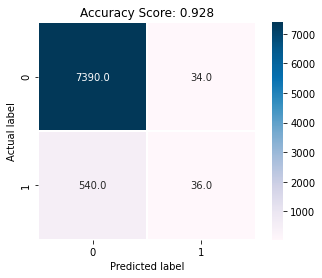

In [336]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, catb_tuned.predict(X_test))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

### Hata

In [341]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27


### Cohen-Matthew Score

In [342]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.09737073845766775
Matthew Score 0.16075892819487733


# Tüm Modellerin Karşılaştırılması

In [366]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 70.7250%
----------------------------
LogisticRegression:
Accuracy: 66.8500%
----------------------------
SVC:
Accuracy: 72.2875%
----------------------------
GaussianNB:
Accuracy: 22.1875%
----------------------------
MLPClassifier:
Accuracy: 92.7500%
----------------------------
DecisionTreeClassifier:
Accuracy: 61.3250%
----------------------------
RandomForestClassifier:
Accuracy: 77.3000%
----------------------------
GradientBoostingClassifier:
Accuracy: 92.2250%
----------------------------
CatBoostClassifier:
Accuracy: 92.8250%
----------------------------
LGBMClassifier:
Accuracy: 93.0250%
----------------------------
XGBClassifier:
Accuracy: 90.8000%


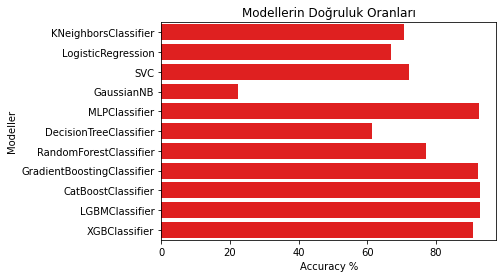

In [367]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

In [368]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    mae = mean_absolute_error(y_pred, y_test)
    print('Mean Absolute Error (MAE): %.2f' % mae)

----------------------------
KNeighborsClassifier:
Mean Absolute Error (MAE): 0.29
----------------------------
LogisticRegression:
Mean Absolute Error (MAE): 0.33
----------------------------
SVC:
Mean Absolute Error (MAE): 0.28
----------------------------
GaussianNB:
Mean Absolute Error (MAE): 0.78
----------------------------
MLPClassifier:
Mean Absolute Error (MAE): 0.07
----------------------------
DecisionTreeClassifier:
Mean Absolute Error (MAE): 0.39
----------------------------
RandomForestClassifier:
Mean Absolute Error (MAE): 0.23
----------------------------
GradientBoostingClassifier:
Mean Absolute Error (MAE): 0.08
----------------------------
CatBoostClassifier:
Mean Absolute Error (MAE): 0.07
----------------------------
LGBMClassifier:
Mean Absolute Error (MAE): 0.07
----------------------------
XGBClassifier:
Mean Absolute Error (MAE): 0.09


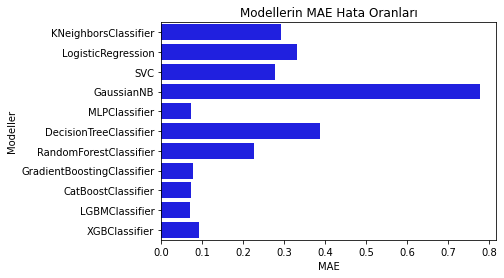

In [372]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","MAE"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)  
    mae = mean_absolute_error(y_pred, y_test)
    sonuc = pd.DataFrame([[isimler, mae]], columns= ["Modeller","MAE"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'MAE', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('MAE')
plt.title('Modellerin MAE Hata Oranları');  

In [369]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    mse = mean_squared_error(y_pred, y_test)
    print('Mean Squared Error (MSE): %.2f' % mse)

----------------------------
KNeighborsClassifier:
Mean Squared Error (MSE): 0.29
----------------------------
LogisticRegression:
Mean Squared Error (MSE): 0.33
----------------------------
SVC:
Mean Squared Error (MSE): 0.28
----------------------------
GaussianNB:
Mean Squared Error (MSE): 0.78
----------------------------
MLPClassifier:
Mean Squared Error (MSE): 0.07
----------------------------
DecisionTreeClassifier:
Mean Squared Error (MSE): 0.39
----------------------------
RandomForestClassifier:
Mean Squared Error (MSE): 0.23
----------------------------
GradientBoostingClassifier:
Mean Squared Error (MSE): 0.08
----------------------------
CatBoostClassifier:
Mean Squared Error (MSE): 0.07
----------------------------
LGBMClassifier:
Mean Squared Error (MSE): 0.07
----------------------------
XGBClassifier:
Mean Squared Error (MSE): 0.09


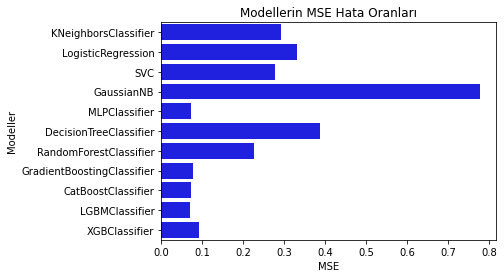

In [374]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","MSE"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)  
    mse = mean_squared_error(y_pred, y_test)
    sonuc = pd.DataFrame([[isimler, mse]], columns= ["Modeller","MSE"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'MSE', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('MSE')
plt.title('Modellerin MSE Hata Oranları');  

In [375]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    mse = mean_squared_error(y_pred, y_test)
    rmse=np.sqrt(mse)
    print('Root Mean Squared Error (RMSE): %.2f' % rmse)

----------------------------
KNeighborsClassifier:
Root Mean Squared Error (RMSE): 0.54
----------------------------
LogisticRegression:
Root Mean Squared Error (RMSE): 0.58
----------------------------
SVC:
Root Mean Squared Error (RMSE): 0.53
----------------------------
GaussianNB:
Root Mean Squared Error (RMSE): 0.88
----------------------------
MLPClassifier:
Root Mean Squared Error (RMSE): 0.27
----------------------------
DecisionTreeClassifier:
Root Mean Squared Error (RMSE): 0.62
----------------------------
RandomForestClassifier:
Root Mean Squared Error (RMSE): 0.48
----------------------------
GradientBoostingClassifier:
Root Mean Squared Error (RMSE): 0.28
----------------------------
CatBoostClassifier:
Root Mean Squared Error (RMSE): 0.27
----------------------------
LGBMClassifier:
Root Mean Squared Error (RMSE): 0.26
----------------------------
XGBClassifier:
Root Mean Squared Error (RMSE): 0.30


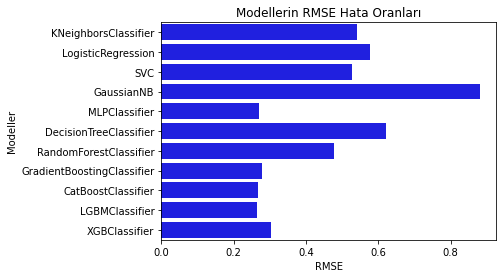

In [376]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","RMSE"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)  
    mse = mean_squared_error(y_pred, y_test)
    rmse=np.sqrt(mse)
    sonuc = pd.DataFrame([[isimler, rmse]], columns= ["Modeller","RMSE"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'RMSE', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('RMSE')
plt.title('Modellerin RMSE Hata Oranları');  

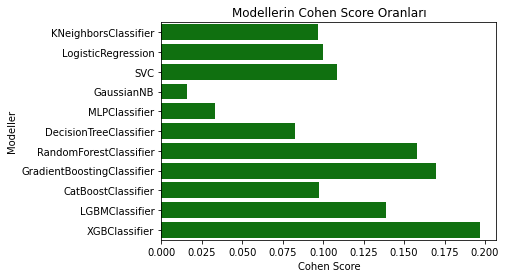

In [378]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Cohen Score"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)  
    cohen=cohen_kappa_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, cohen]], columns= ["Modeller","Cohen Score"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Cohen Score', y = 'Modeller', data=sonuclar, color="g")
plt.xlabel('Cohen Score')
plt.title('Modellerin Cohen Score Oranları');  

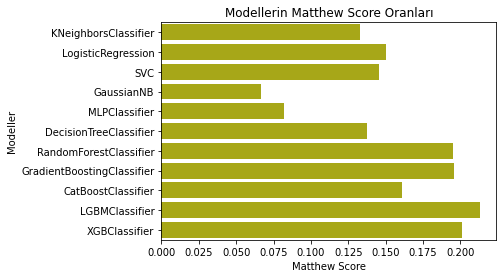

In [381]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Matthew Score"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)  
    matthews=matthews_corrcoef(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, matthews]], columns= ["Modeller","Matthew Score"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Matthew Score', y = 'Modeller', data=sonuclar, color="y")
plt.xlabel('Matthew Score')
plt.title('Modellerin Matthew Score Oranları'); 

## Sonuç

Bu çalışmada, bir müşterinin vadeli hesap yatırım ürünü kullanma kararı üzerinde etkili olan faktörlerin sınıflandırılması, sınıflandırma modellerinin performans ölçümleri sonucunda en iyi modelin seçilmesi amaçlanmıştır.
Veri seti 40.000 kayıt içermektedir.Eksik veri tespit edilmemiştir.Değişkenler arasındaki ilişkiler incelenmiştir ve campaign bağımlı değişkeni için en önemli değişken duration olarak tespit edilmiştir.Kampanyaya olumlu geri dönüş yapma olasılığı, son iletişim süresi arttıkça artmaktadır. Ayrıca yıllık gelir değişkeniyle yaş değişkeni arasında pozitif korelasyon tespit edilmiştir.Veri ön işleme işlemleri yapıldıktan sonra veriye tüm sınıflandırma modelleri uygulanmıştır ve modeller için en uygun parametreler seçildikten sonra modellerin doğruluk oranları tespit edilmiştir.Daha sonra MSE,MAE ve RMSE hata oranları bulunup Cohen ve Matthew Score'ları da bulunduktan sonra en uygun modelin LightGBM olduğuna karar verilmiştir.Model %93.025 oranında doğru sonuç vermektedir.